In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"sample_sales_data.csv")

In [3]:
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [4]:
data = df.copy(deep = True)

In [5]:
data.corr()

,Unnamed: 0,unit_price,quantity,total
Unnamed: 0,1.000000,0.623392,0.003927,0.483878
unit_price,0.623392,1.000000,0.024588,0.792018
quantity,0.003927,0.024588,1.000000,0.521926
total,0.483878,0.792018,0.521926,1.000000


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB
None


In [7]:
print(data.describe())

        Unnamed: 0   unit_price     quantity        total
count  7829.000000  7829.000000  7829.000000  7829.000000
mean   3914.000000     7.819480     2.501597    19.709905
std    2260.181962     5.388088     1.122722    17.446680
min       0.000000     0.190000     1.000000     0.190000
25%    1957.000000     3.990000     1.000000     6.570000
50%    3914.000000     7.190000     3.000000    14.970000
75%    5871.000000    11.190000     4.000000    28.470000
max    7828.000000    23.990000     4.000000    95.960000


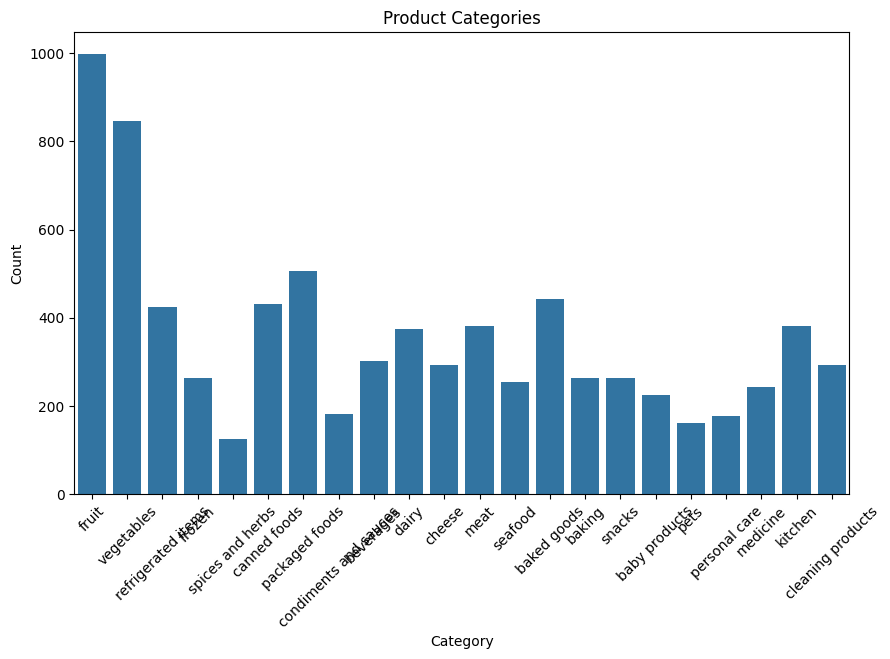

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=data)
plt.title('Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

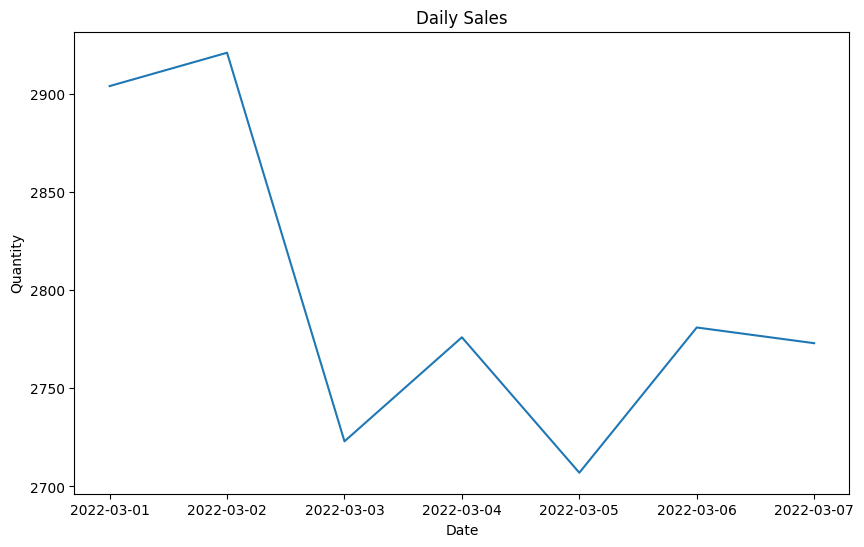

In [9]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
daily_sales = data.groupby(data['timestamp'].dt.date)['quantity'].sum()
plt.figure(figsize=(10, 6))
daily_sales.plot()
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

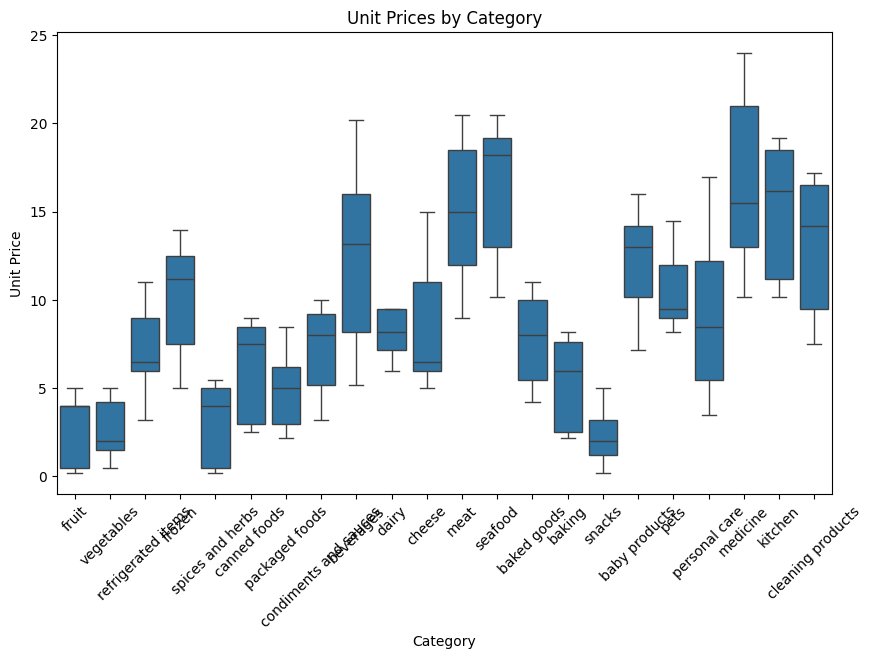

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='unit_price', data=data)
plt.title('Unit Prices by Category')
plt.xlabel('Category')
plt.ylabel('Unit Price')
plt.xticks(rotation=45)
plt.show()

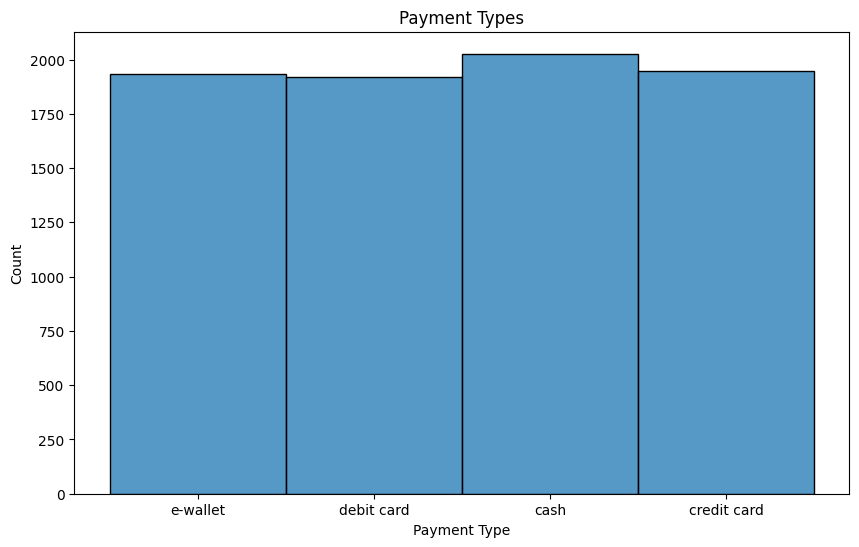

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='payment_type', bins=10)
plt.title('Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

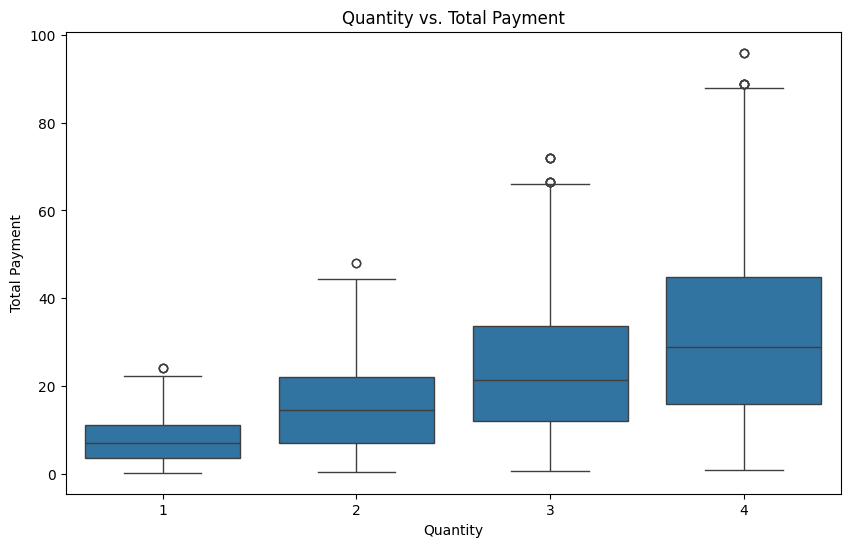

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quantity', y='total', data=data)
plt.title('Quantity vs. Total Payment')
plt.xlabel('Quantity')
plt.ylabel('Total Payment')
plt.show()

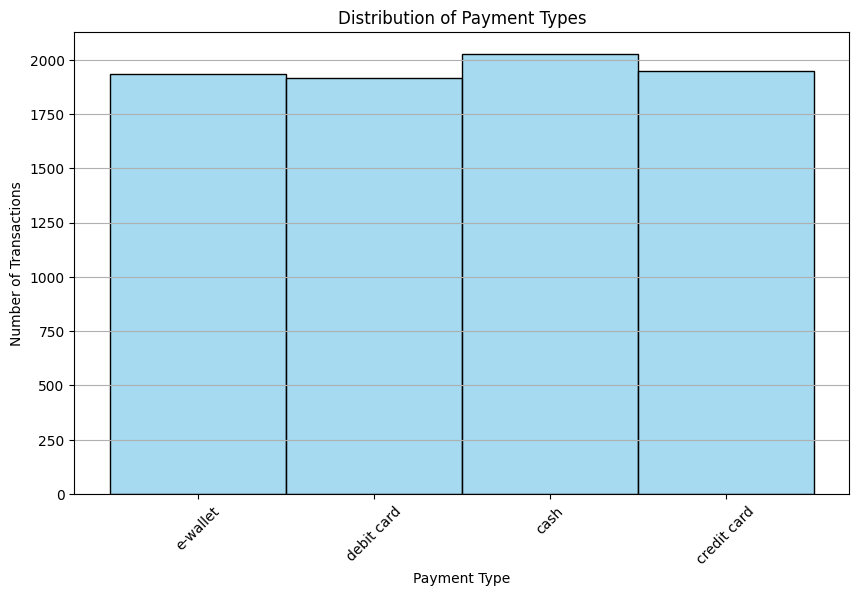

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="payment_type", bins=10, kde=False, color="skyblue")
plt.xlabel("Payment Type")
plt.ylabel("Number of Transactions")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis="y")
plt.show()

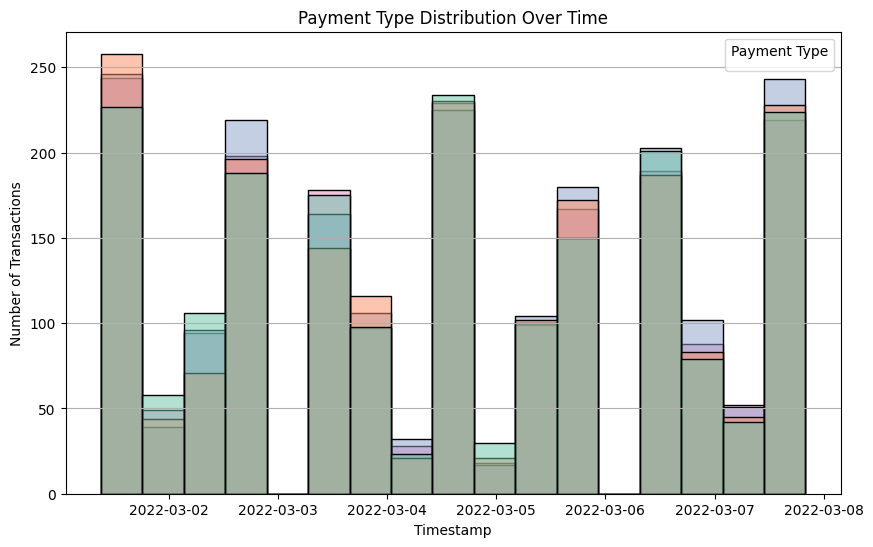

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="timestamp", hue="payment_type", kde=False, palette="Set2")
plt.xlabel("Timestamp")
plt.ylabel("Number of Transactions")
plt.title("Payment Type Distribution Over Time")
plt.grid(axis="y")
plt.legend(title="Payment Type")
plt.show()

In [15]:
data["hour"] = data["timestamp"].dt.hour

In [16]:
hourly_counts = data.groupby("hour")["transaction_id"].count()

In [17]:
busiest_hour = hourly_counts.idxmax()
print(busiest_hour)

11


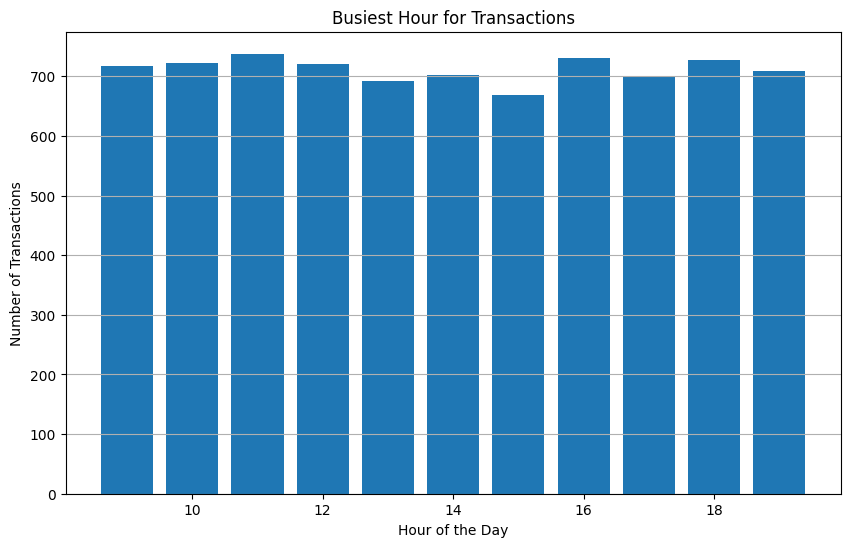

The busiest hour for transactions is around 11:00.


In [18]:
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Busiest Hour for Transactions')
plt.grid(axis='y')
plt.show()

print(f'The busiest hour for transactions is around {busiest_hour}:00.')